In [17]:
# import the libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.stats import moment
import plotly.express as px
import pandas as pd
import collections
import math

In [18]:
def get_freq_pixel_from_image(current_image):
    return dict(collections.Counter(current_image.ravel()))

def build_adapted_histplot(freq_pixel_dict):
    fig = px.bar(x=list(freq_pixel_dict.keys()), y=list(freq_pixel_dict.values()))
    fig.show()

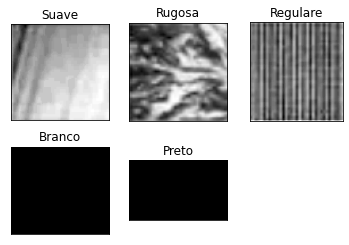

In [19]:
title_image_list = ["Suave", "Rugosa", "Regulare", "Branco", "Preto"]
image_list = []
for i in range(1,6):
#     img = plt.imread('image{}.png'.format(i), 0)
    img = cv2.imread('image{}.png'.format(i), 0)
#     img = img.astype(float)
#     img = img/255.0
    image_list.append(img)
    plt.subplot(2, 3, i).set_title(title_image_list[i-1])
    plt.imshow(image_list[i-1], cmap='gray')
    plt.xticks([])
    plt.yticks([])

### Image 1

In [20]:
current_image = image_list[0]
print("Shape {}".format(current_image.shape))
print("Quant de pixels: {}".format(current_image.shape[0]*current_image.shape[1]))

Shape (85, 87)
Quant de pixels: 7395


[pixel:freq]
{129: 248, 120: 678, 112: 440, 114: 513, 119: 189, 124: 262, 117: 198, 110: 285, 109: 393, 105: 72, 115: 241, 118: 203, 122: 324, 123: 242, 125: 358, 127: 355, 126: 264, 101: 89, 90: 34, 92: 19, 98: 25, 102: 43, 99: 21, 96: 40, 93: 50, 89: 14, 85: 4, 84: 3, 80: 1, 103: 122, 107: 216, 106: 172, 111: 337, 82: 1, 87: 5, 95: 35, 116: 312, 128: 374, 130: 169, 131: 44, 0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 81: 0, 83: 0, 86: 0, 88: 0, 91: 0, 94: 0, 97: 0, 100: 0, 104: 0, 108: 0

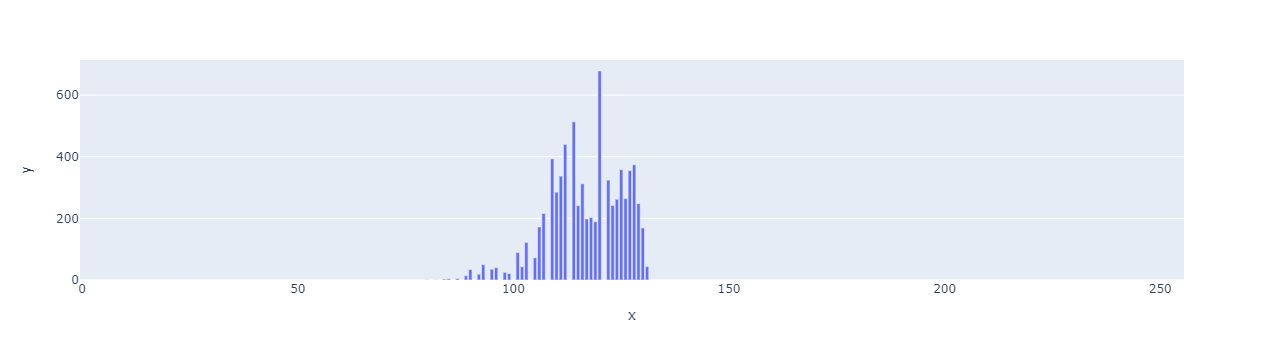

In [21]:
freq_pixel_dict=get_freq_pixel_from_image(current_image)

for i in range(0,256):
    if not i in freq_pixel_dict.keys():
        freq_pixel_dict[i] = 0
        
print("[pixel:freq]\n{}".format(freq_pixel_dict))

build_adapted_histplot(freq_pixel_dict)

In [22]:
def media(freq_pixel_dict):
    amount_of_pixel=np.array(list(freq_pixel_dict.values())).sum()
    m = 0

    for pixel_i, freq_i in freq_pixel_dict.items():
        prob_i = freq_i/amount_of_pixel
        m = m + pixel_i * prob_i
        
    return m

In [23]:
def general_moment(freq_pixel_dict, n):
    amount_of_pixel=np.array(list(freq_pixel_dict.values())).sum()
    
    momento = 0
    m = media(freq_pixel_dict)
    for pixel_i, freq_i in freq_pixel_dict.items():
        prob_i = freq_i/amount_of_pixel
        momento = momento + ((pixel_i - m)**n)*prob_i
    return momento

In [24]:
def variancia(freq_pixel_dict):
    return general_moment(freq_pixel_dict, 2)

In [25]:
def desvio_padrao(freq_pixel_dict):
    return math.sqrt(variancia(freq_pixel_dict))

In [26]:
def R(freq_pixel_dict):
    variancia_normaliza=variancia(freq_pixel_dict)/(255)**2
    return 1-(1/(1+variancia_normaliza))

In [27]:
def terceiro_momento(freq_pixel_dict):
    return general_moment(freq_pixel_dict, 3)

In [28]:
def uniformidade(freq_pixel_dict):
    
    amount_of_pixel=np.array(list(freq_pixel_dict.values())).sum()
    
    U = 0
    for pixel_i, freq_i in freq_pixel_dict.items():
        prob_i = freq_i/amount_of_pixel
        prob_i = prob_i**2
        U=U+prob_i
        
    return U

In [29]:
def entropia(freq_pixel_dict):
    
    amount_of_pixel=np.array(list(freq_pixel_dict.values())).sum()

    entropia = 0
    for pixel_i, freq_i in freq_pixel_dict.items():
        prob_i = freq_i/amount_of_pixel
        if prob_i != 0:
            entropia =  entropia + (prob_i * math.log(prob_i, 2))

    entropia = -abs(entropia)
    return entropia

In [30]:
print("Intensidade Média: {}".format(media(freq_pixel_dict)))
print("Variancia: {}".format(variancia(freq_pixel_dict)))
print("Desvio Padrão: {}".format(desvio_padrao(freq_pixel_dict)))
print("R: {}".format(R(freq_pixel_dict)))
print("Terceiro Momento: {}".format(terceiro_momento(freq_pixel_dict)))
print("Uniformidade: {}".format(uniformidade(freq_pixel_dict)))
print("Entropia: {}".format(entropia(freq_pixel_dict)))

Intensidade Média: 116.99053414469238
Variancia: 74.81451486005793
Desvio Padrão: 8.64953841890178
R: 0.0011492277730372757
Terceiro Momento: -400.03420495026967
Uniformidade: 0.04460801457045015
Entropia: -4.7109442789335345


In [31]:
M = cv2.moments(current_image)
M

{'m00': 865145.0,
 'm10': 38216499.0,
 'm01': 37330194.0,
 'm20': 2229250343.0,
 'm11': 1646828185.0,
 'm02': 2128435600.0,
 'm30': 145520155065.0,
 'm21': 95979269991.0,
 'm12': 93748609123.0,
 'm03': 135748054590.0,
 'mu20': 541093102.5177673,
 'mu11': -2177844.822522441,
 'mu02': 517672798.2989716,
 'mu30': -757649842.343261,
 'mu21': -18381928.380436108,
 'mu12': -83937143.24564527,
 'mu03': -766131867.2451818,
 'nu20': 0.0007229265811558728,
 'nu11': -2.9097061199046965e-06,
 'nu02': 0.0006916359208614765,
 'nu30': -1.088294117640819e-06,
 'nu21': -2.6403944684330837e-08,
 'nu12': -1.2056796443498009e-07,
 'nu03': -1.1004777640834737e-06}